In [40]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from prophet.serialize import model_to_json, model_from_json

In [3]:
df = pd.read_csv(
    './data/nyc_weather_large.csv'
    , parse_dates=['DATE']
);

df.head(1)

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2018-01-01,NaN,19,7


In [5]:
cols = [
    c.strip().lower().replace(' ','_')
    for c in df.columns
]

df.columns = cols; df.head(1)

,station,name,date,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2018-01-01,NaN,19,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  1806 non-null   object        
 1   name     1806 non-null   object        
 2   date     1806 non-null   datetime64[ns]
 3   tavg     0 non-null      float64       
 4   tmax     1806 non-null   int64         
 5   tmin     1806 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 84.8+ KB


In [7]:
print(f'start: {df.date.min()}, end: {df.date.max()}')

start: 2018-01-01 00:00:00, end: 2022-12-11 00:00:00


In [10]:
df.tavg = (df.tmin + df.tmax) / 2

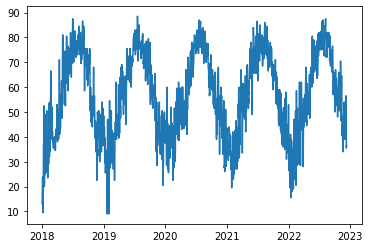

In [11]:
plt.plot(df.date, df.tavg)
plt.show()

In [26]:
train = df.loc[df.date < pd.to_datetime('2022-12-12')]
test = df.loc[df.date >= pd.to_datetime('2022-01-01')]

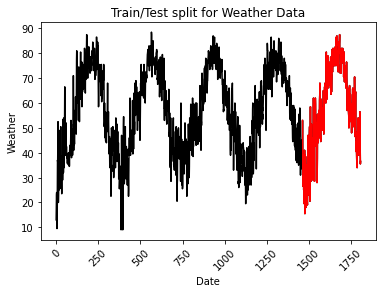

In [27]:
plt.plot(train.tavg, color = "black")
plt.plot(test.tavg, color = "red")
plt.ylabel('Weather')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Weather Data")
plt.show()

In [28]:
m = Prophet()

In [29]:
train_data = train[['date','tavg']]; train_data.head(1)

,date,tavg
0,2018-01-01,13.0


In [47]:
train_data.tail()

,ds,y
1801,2022-12-07,56.5
1802,2022-12-08,48.5
1803,2022-12-09,40.5
1804,2022-12-10,35.5
1805,2022-12-11,36.5


In [30]:
train_data = train_data.rename(columns={'date':'ds','tavg':'y'}); train_data.head()

,ds,y
0,2018-01-01,13.0
1,2018-01-02,19.5
2,2018-01-03,23.0
3,2018-01-04,24.0
4,2018-01-05,14.0


In [31]:
m.fit(train_data)

21:36:26 - cmdstanpy - INFO - Chain [1] start processing
21:36:26 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = m.make_future_dataframe(periods=7); future.tail(10)

,ds
1803,2022-12-09
1804,2022-12-10
1805,2022-12-11
1806,2022-12-12
1807,2022-12-13
1808,2022-12-14
1809,2022-12-15
1810,2022-12-16
1811,2022-12-17
1812,2022-12-18


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1831,2023-01-06,36.969526,28.005760,45.225615
1832,2023-01-07,36.074555,26.841883,45.320205
1833,2023-01-08,35.658312,26.770771,45.037205
1834,2023-01-09,35.602174,26.651363,44.344437
1835,2023-01-10,35.784015,26.817798,44.906925


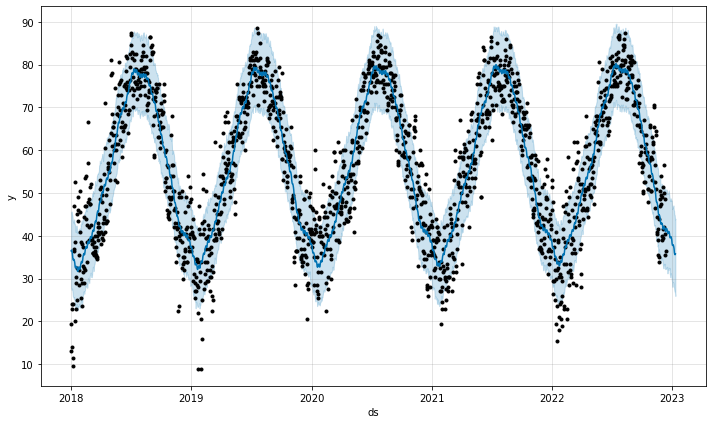

In [34]:
fig1 = m.plot(forecast)

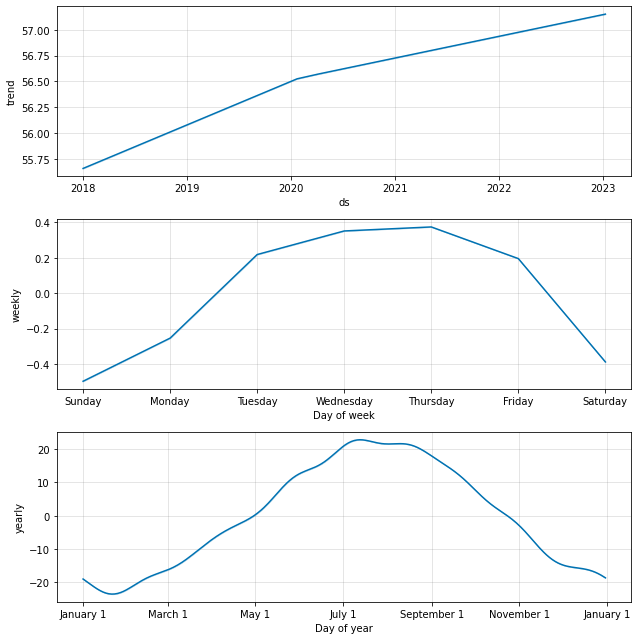

In [35]:
fig2 = m.plot_components(forecast)


In [41]:
with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)

In [51]:
from datetime import datetime, timedelta
today = datetime.now().strftime('%Y-%m-%d')

str

In [61]:
(datetime.now() + timedelta(days=10)).strftime('%Y-%m-%d')

'2022-12-26'